# Chapter 2  Distributions

## Histograms
The most common representation of a distribution is a histogram. which is a graph that shows the **frequency** of each value


In [1]:
from matplotlib import pyplot as plt
%matplotlib inline  
import seaborn as sns

import numpy as np
import pandas as pd

import thinkstats2
import thinkplot


/home/leo/anaconda2/envs/python-machine-learning-book/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

In [3]:
hist.Freq(2) # hist[2]

2

In [4]:
hist.Values()

[1, 2, 3, 5]

/home/leo/anaconda2/envs/python-machine-learning-book/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


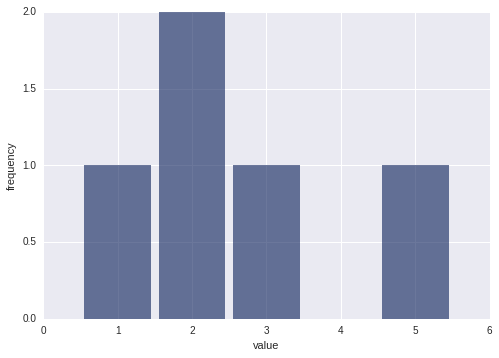

In [5]:
thinkplot.Hist(hist)
thinkplot.Show(xlabel='value', ylabel='frequency')


## NSFG variables

In [6]:
import nsfg

Histogram of pregnancy length in weeks

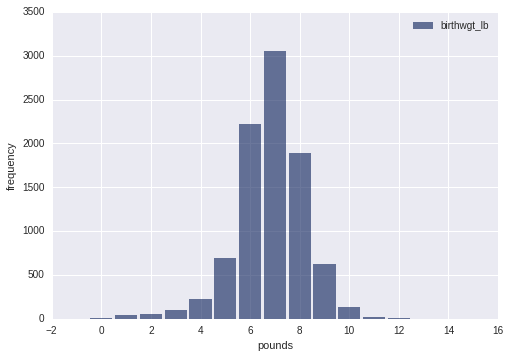

In [7]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')


Histogram of pregnancy lengths

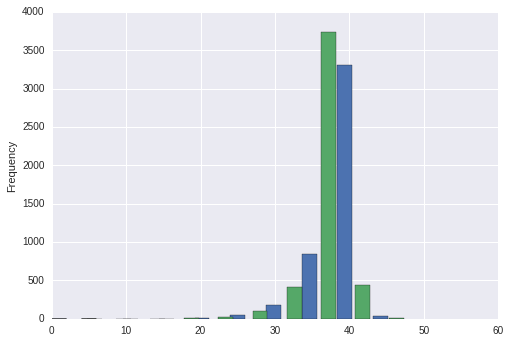

In [8]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]
firsts.prglngth.plot(kind='hist', width=2)
others.prglngth.plot(kind='hist', width=2)


## Summarizing distributions

Some of the characteristics we might want to report are:
- central tendency
- modes
- spread
- tails
- outliers


## mean

$$\overline{x}= \frac{1}{n}\sum_{i}a_i$$

## Variance

$$S^{2} = \frac{1}{n}\sum_i(x_{i}-\overline{x})^{2}$$

$x_{i}-\overline{x}$ is called the “deviation from the mean”

$\sqrt{S}$ is the **standard deviation**.

Pandas data structures provides methods to compute mean, variance and standard deviation:
```python
mean = live.prglngth.mean()
var = live.prglngth.var() # variance
std = live.prglngth.std() # standard deviation

```

## Effect size

An effect size is a quantitative measure of the strength of an event.

One obvious choice is the difference in the means.
Another way to convey the size of the effect is to compare the difference between groups to the variability within groups.

**Cohen's d**
$$d = \frac{\overline{x_1} -\overline{x_2}}{s}$$

s is the “pooled standard deviation”

$$s=\sqrt{\frac{(n_1-1)S_1^2 + (n_2-1)S_2^2}{n_1 +n_2 -2}}$$
$n_i$ is the sample size of $x_i$, $S_i$ is the variance.

## Reporting results

- **Who**
  - A scientist might be interested in any (real) effect, no matter how small.
  - A doctor might only care about effects that are clinically significant.
- **How**
  - Goals

## Exercise2

In [9]:
import thinkstats2
resp = thinkstats2.ReadStataDct('2002FemResp.dct').ReadFixedWidth('2002FemResp.dat.gz', compression='gzip')

Make a histogram of totincr the total income for the respondent's family. 

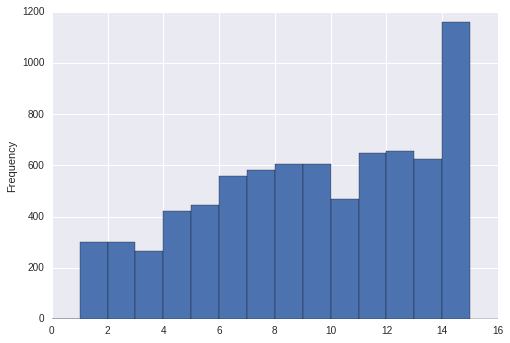

In [10]:
resp.totincr.plot.hist(bins=range(17))

Make a histogram of age_r, the respondent's age at the time of interview.

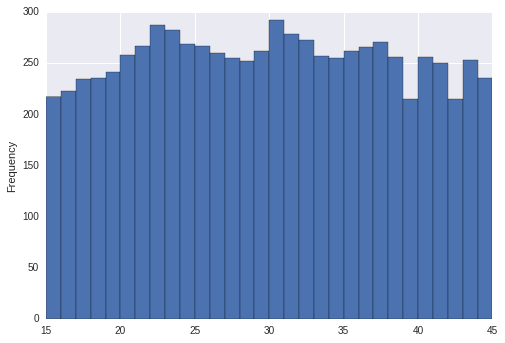

In [11]:
resp.ager.plot.hist(bins=range(15,46))

Use totincr to select the respondents with the highest income. Compute the distribution of parity for just the high income respondents.

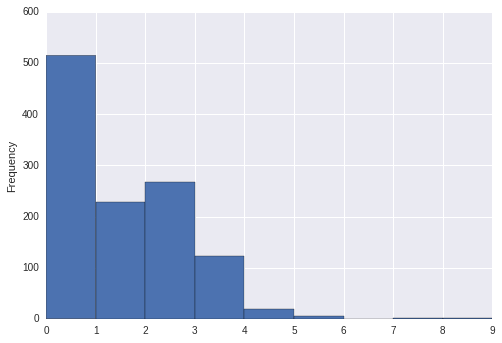

In [12]:
rich = resp[resp.totincr == resp.totincr.max() ]
rich.parity.plot.hist(bins=range(10))

Compare the mean parity for high income respondents and others.

In [13]:
rich = resp[resp.totincr == resp.totincr.max() ]
notrich = resp[resp.totincr < resp.totincr.max()]
rich.parity.mean(), notrich.parity.mean()

(1.0758620689655172, 1.2495758136665125)

## Exercise 4
Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

In [14]:
preg = nsfg.ReadFemPreg()

In [15]:
first = preg[preg.birthord ==1 ]
others = preg[preg.birthord >1 ]

first.totalwgt_lb.mean(), others.totalwgt_lb.mean()

(7.201094430437772, 7.3258556149732623)

In [16]:
def CohenEffectSize(group1, group2):
    mean_diff = group1.mean() - group2.mean()
    n1= len(group1)
    n2 = len(group2)
    
    pooled_var = (n1*group1.var() + n2* group2.var())/(n1+n2)
    d = mean_diff / np.math.sqrt(pooled_var)
    return d

In [17]:
CohenEffectSize(first.totalwgt_lb, others.totalwgt_lb)

-0.088672927072601743

## Glossary
- **distribution**: The values that appear in a sample and the frequency of each.
- **histogram**: A mapping from values to frequencies, or a graph that shows this mapping.
- **frequency**: The number of times a value appears in a sample.
- **mode**: The most frequent value in a sample, or one of the most frequent values.
- **normal distribution**: An idealization of a bell-shaped distribution; also known as a Gaussian distribution.
- **uniform distribution**: A distribution in which all values have the same frequency.
- **tail**: The part of a distribution at the high and low extremes.
- **central tendency**: A characteristic of a sample or population; intuitively, it is an average or typical value.
- **outlier**: A value far from the central tendency.
- **spread**: A measure of how spread out the values in a distribution are.
- **summary statistic**: A statistic that quantifies some aspect of a distribution, like central tendency or spread.
- **variance**: A summary statistic often used to quantify spread.
- **standard deviation**: The square root of variance, also used as a measure of spread.
- **effect size**: A summary statistic intended to quantify the size of an effect like a difference between groups.
- **clinically significant**: A result, like a difference between groups, that is relevant in practice.